In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Optimization

In [3]:
T=pd.Series([0,-1,1,-1,1],name='Temp')
S=pd.Series([0,-1,-1,1,1], name='Substrate')
y=pd.Series([407,193,310,468,571],name='Profit')

In [4]:
DFP=pd.concat([T,S,y],axis='columns')
print(DFP)

   Temp  Substrate  Profit
0     0          0     407
1    -1         -1     193
2     1         -1     310
3    -1          1     468
4     1          1     571


In [5]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model_P=ols('y~T*S',data=DFP)
results_P=model_P.fit()
print(results_P.summary2())

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.982  
Dependent Variable: y                AIC:                43.7070
Date:               2023-04-05 16:08 BIC:                42.1448
No. Observations:   5                Log-Likelihood:     -17.854
Df Model:           3                F-statistic:        75.69  
Df Residuals:       1                Prob (F-statistic): 0.0842 
R-squared:          0.996            Scale:              369.80 
----------------------------------------------------------------
              Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
----------------------------------------------------------------
Intercept    389.8000   8.6000 45.3256 0.0140  280.5266 499.0734
T             55.0000   9.6151  5.7202 0.1102  -67.1713 177.1713
S            134.0000   9.6151 13.9364 0.0456   11.8287 256.1713
T:S           -3.5000   9.6151 -0.3640 0.7778 -125.6713 118.6713
------------------------------------------

C:\Users\carol\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


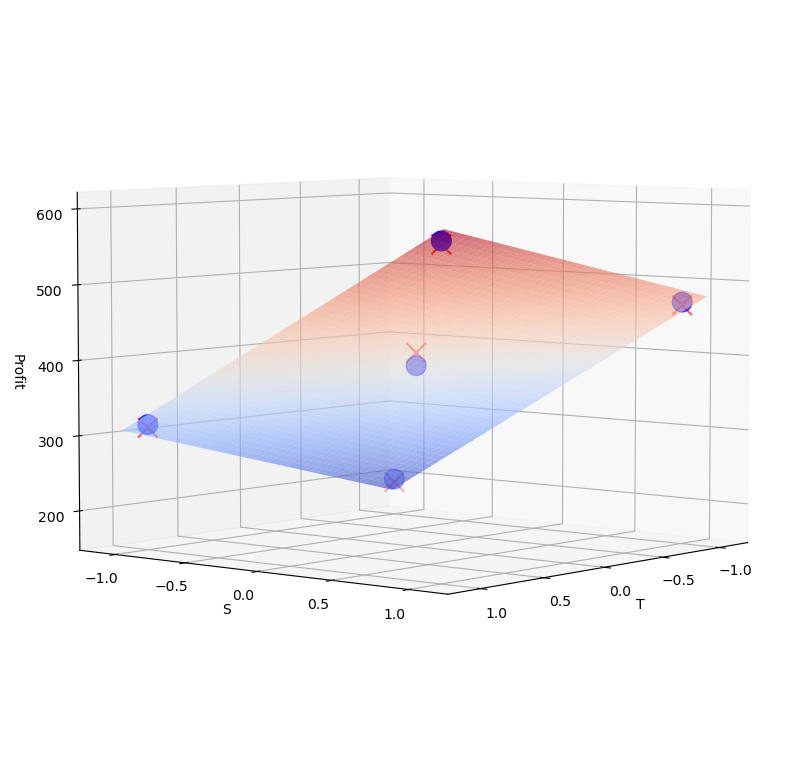

In [6]:
fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df = DFP
x = df['Temp']
y= df['Substrate']
z = df['Profit']

x1,x2,x3=model_P.exog_names[1:]

x_surf=np.arange(-1.1,1.1,0.01)
y_surf=np.arange(-1.1,1.1,0.01)
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})
zS=results_P.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.6,cmap='coolwarm')

ax.scatter(x,y,z,marker='x',color='r',s=200,label="Raw Data")
ax.view_init(elev=5,azim=40)

ax.set_xlabel("T")
ax.set_ylabel("S")
ax.set_zlabel("Profit")
             
ax.scatter(x.values,y.values,results_P.fittedvalues.values,s=200,color='blue',label="Fited Values")

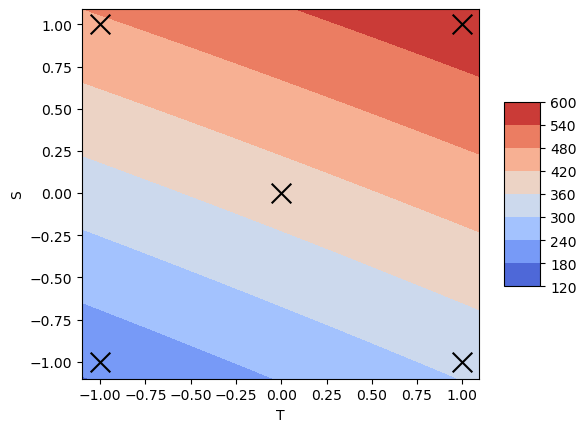

In [7]:
fig, ax = plt.subplots(1, 1)

contour_P=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(contour_P,shrink=0.5,aspect=5)
plt.xlabel("T")
plt.ylabel("S")
ax.scatter(x,y,marker='x',color='black',s=200,label="Raw Data")

In [8]:
DFP

,Temp,Substrate,Profit
0,0,0,407
1,-1,-1,193
2,1,-1,310
3,-1,1,468
4,1,1,571


In [9]:
model_PA=ols('Profit~Temp+Substrate',data=DFP)
results_PA=model_PA.fit()
print(results_PA.summary2())

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.990  
Dependent Variable: Profit           AIC:                42.3292
Date:               2023-04-05 16:08 BIC:                41.1575
No. Observations:   5                Log-Likelihood:     -18.165
Df Model:           2                F-statistic:        200.4  
Df Residuals:       2                Prob (F-statistic): 0.00497
R-squared:          0.995            Scale:              209.40 
----------------------------------------------------------------
               Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
----------------------------------------------------------------
Intercept     389.8000   6.4715 60.2336 0.0003 361.9555 417.6445
Temp           55.0000   7.2353  7.6016 0.0169  23.8689  86.1311
Substrate     134.0000   7.2353 18.5202 0.0029 102.8689 165.1311
----------------------------------------------------------------
Omnibus:               nan         Durbin-

C:\Users\carol\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [10]:
from statsmodels.stats.anova import anova_lm
anova_resultsPA = anova_lm(results_PA)
print(anova_resultsPA)

            df   sum_sq  mean_sq           F    PR(>F)
Temp       1.0  12100.0  12100.0   57.784145  0.016869
Substrate  1.0  71824.0  71824.0  342.999045  0.002903
Residual   2.0    418.8    209.4         NaN       NaN


In [11]:
model_PB=ols('Profit~Temp+Substrate+I(Temp*Temp) + I(Substrate*Substrate)',data=DFP)
results_PB=model_PB.fit()
print(results_PB.summary2())

                      Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.998  
Dependent Variable:      Profit              AIC:                   33.6013
Date:                    2023-04-05 16:08    BIC:                   32.0390
No. Observations:        5                   Log-Likelihood:        -12.801
Df Model:                3                   F-statistic:           573.4  
Df Residuals:            1                   Prob (F-statistic):    0.0307 
R-squared:               0.999               Scale:                 49.000 
---------------------------------------------------------------------------
                          Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
---------------------------------------------------------------------------
Intercept                407.0000   7.0000 58.1429 0.0109 318.0566 495.9434
Temp                      55.0000   3.5000 15.7143 0.0405  10.5283  99.4717
Substrate                134.0000 

C:\Users\carol\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [12]:
T1=pd.Series([0,-1,1,-1,1],name='Temp')
S1=pd.Series([0,-1,-1,1,1], name='Substrate')
y1=pd.Series([688,694,725,620,642],name='Profit')

In [13]:
DFP1=pd.concat([T1,S1,y1],axis='columns')
print(DFP1)

   Temp  Substrate  Profit
0     0          0     688
1    -1         -1     694
2     1         -1     725
3    -1          1     620
4     1          1     642


In [14]:
model_P1=ols('y1~T1*S1',data=DFP1)
results_P1=model_P1.fit()
print(results_P1.summary2())

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.859  
Dependent Variable: y1               AIC:                41.7903
Date:               2023-04-05 16:08 BIC:                40.2281
No. Observations:   5                Log-Likelihood:     -16.895
Df Model:           3                F-statistic:        9.105  
Df Residuals:       1                Prob (F-statistic): 0.238  
R-squared:          0.965            Scale:              252.05 
----------------------------------------------------------------
              Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
----------------------------------------------------------------
Intercept    673.8000   7.1000 94.9014 0.0067  583.5859 764.0141
T1            13.2500   7.9380  1.6692 0.3436  -87.6124 114.1124
S1           -39.2500   7.9380 -4.9445 0.1270 -140.1124  61.6124
T1:S1         -2.2500   7.9380 -0.2834 0.8242 -103.1124  98.6124
------------------------------------------

C:\Users\carol\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


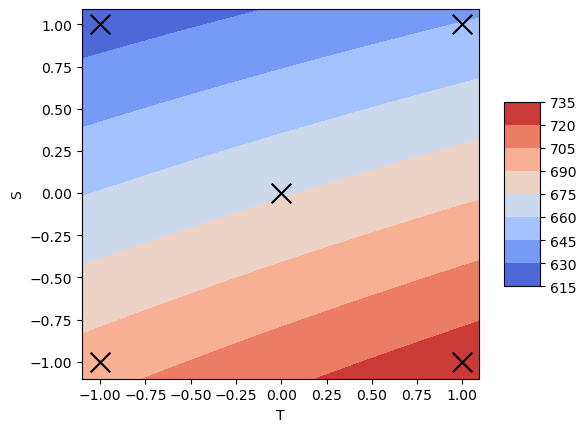

In [15]:
df = DFP1
x = df['Temp']
y= df['Substrate']
z = df['Profit']

x1,x2,x3=model_P1.exog_names[1:]

x_surf=np.arange(-1.1,1.1,0.01)
y_surf=np.arange(-1.1,1.1,0.01)
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})
zS=results_P1.predict(exog=exog).values.reshape(xS.shape)

fig, ax = plt.subplots(1, 1)

contour_P=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(contour_P,shrink=0.5,aspect=5)
plt.xlabel("T")
plt.ylabel("S")
ax.scatter(x,y,marker='x',color='black',s=200,label="Raw Data")

# Experiments 6,8,9,10,11,12 with added quadratic terms to capture curving

In [16]:
T3=pd.Series([0,-1,1,-1,1,1 ],name='Temp')
S3=pd.Series([0,-1,-1,1,1 ,-3], name='Substrate')
y3=pd.Series([688,694,725,620,642,716],name='Profit')

In [17]:
DFP3=pd.concat([T3,S3,y3],axis='columns')
print(DFP3)

   Temp  Substrate  Profit
0     0          0     688
1    -1         -1     694
2     1         -1     725
3    -1          1     620
4     1          1     642
5     1         -3     716


In [18]:
model_P3=ols('y3~T3*S3+I(T3**2)+I(S3**2)',data=DFP3)
results_P3=model_P3.fit()
print(results_P3.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     nan      
Dependent Variable: y3               AIC:                -312.2565
Date:               2023-04-05 16:08 BIC:                -313.5060
No. Observations:   6                Log-Likelihood:     162.13   
Df Model:           5                F-statistic:        nan      
Df Residuals:       0                Prob (F-statistic): nan      
R-squared:          1.000            Scale:              inf      
--------------------------------------------------------------------
              Coef.     Std.Err.      t      P>|t|   [0.025   0.975]
--------------------------------------------------------------------
Intercept    688.0000        inf    0.0000     nan      nan      nan
T3            13.2500        inf    0.0000     nan      nan      nan
S3           -39.2500        inf   -0.0000     nan      nan      nan
T3:S3         -2.2500        inf   -0.0000     nan      nan      nan

C:\Users\carol\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)


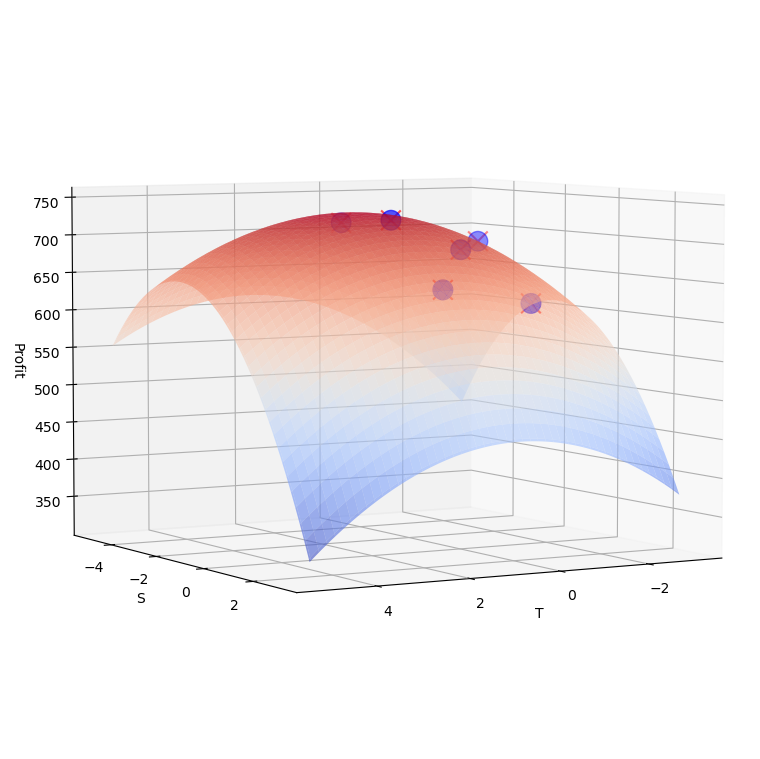

In [19]:
fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df = DFP3
x = df['Temp']
y= df['Substrate']
z = df['Profit']

x1,x2,x3,x4,x5=model_P3.exog_names[1:]

x_surf=np.arange(-3.1,5.1,0.01)
y_surf=np.arange(-5.1,3.1,0.01)
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})
zS=results_P3.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.6,cmap='coolwarm')

ax.scatter(x,y,z,marker='x',color='r',s=200,label="Raw Data")
ax.view_init(elev=5,azim=60)

ax.set_xlabel("T")
ax.set_ylabel("S")
ax.set_zlabel("Profit")
             
ax.scatter(x.values,y.values,results_P3.fittedvalues.values,s=200,color='blue',label="Fited Values")

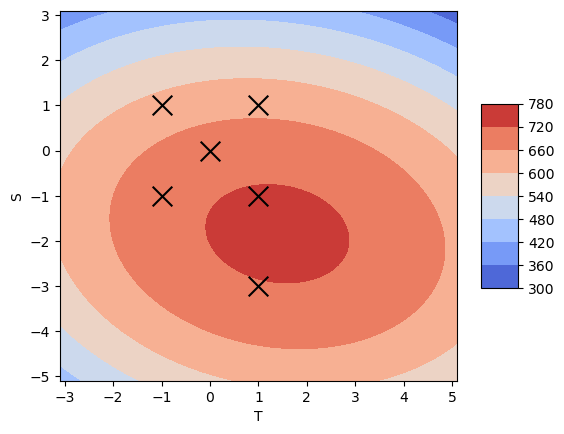

In [20]:
fig, ax = plt.subplots(1, 1)

contour_P3=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(contour_P3,shrink=0.5,aspect=5)
plt.xlabel("T")
plt.ylabel("S")
ax.scatter(x,y,marker='x',color='black',s=200,label="Raw Data")

# Adding all the expeiments 1 through 12

In [23]:
T5=pd.Series([0,-1,1,-1,1,  1,2,   3,  1,3,1,3 ,3  ],name='Temp')
S5=pd.Series([0,-1,-1,1,1,  2.44,4.88, 7.32,  3.88,3.88,5.88,5.88,1.88 ], name='Substrate')
y5=pd.Series([407,193,310,468,571,669,688,463 ,694,725,620,642,716],name='Profit')

In [25]:
DFP5=pd.concat([T5,S5,y5],axis='columns')
print(DFP5)

    Temp  Substrate  Profit
0      0       0.00     407
1     -1      -1.00     193
2      1      -1.00     310
3     -1       1.00     468
4      1       1.00     571
5      1       2.44     669
6      2       4.88     688
7      3       7.32     463
8      1       3.88     694
9      3       3.88     725
10     1       5.88     620
11     3       5.88     642
12     3       1.88     716


In [26]:
model_P5=ols('y5~T5*S5+I(T5**2)+I(S5**2)',data=DFP5)
results_P5=model_P5.fit()
print(results_P5.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.998   
Dependent Variable: y5               AIC:                95.2183 
Date:               2023-04-05 16:13 BIC:                98.6080 
No. Observations:   13               Log-Likelihood:     -41.609 
Df Model:           5                F-statistic:        1054.   
Df Residuals:       7                Prob (F-statistic): 6.60e-10
R-squared:          0.999            Scale:              65.534  
-----------------------------------------------------------------
               Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
-----------------------------------------------------------------
Intercept     405.0144   3.9349 102.9275 0.0000 395.7097 414.3191
T5             55.5699   3.7600  14.7793 0.0000  46.6789  64.4608
S5            134.3509   2.5871  51.9317 0.0000 128.2335 140.4684
T5:S5          -7.3479   1.6215  -4.5316 0.0027 -11.1821  -3.5137
I(T5 ** 2)     -1.5057   1.

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


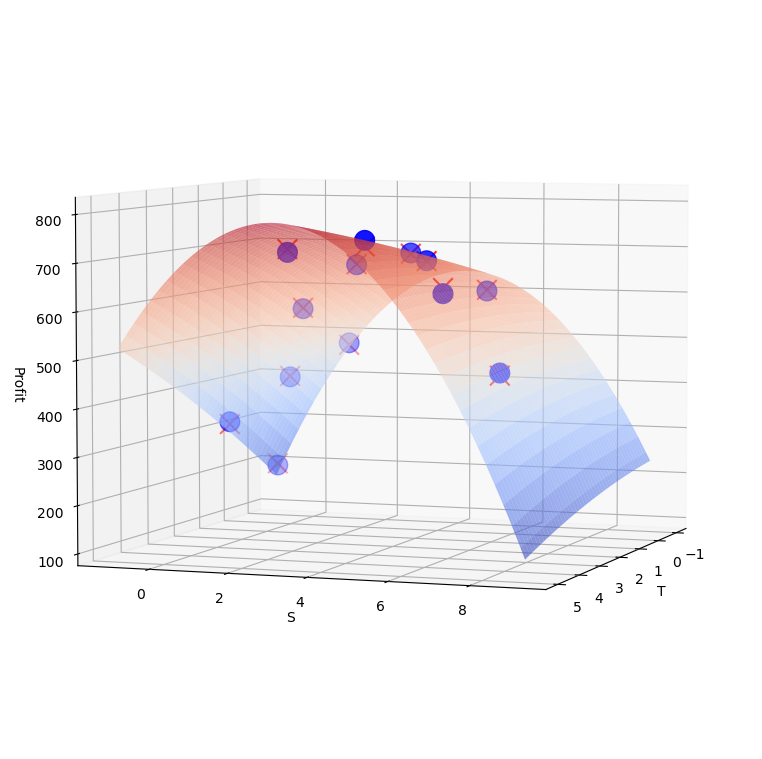

In [27]:
fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df = DFP5
x = df['Temp']
y= df['Substrate']
z = df['Profit']

x1,x2,x3,x4,x5=model_P5.exog_names[1:]

x_surf=np.arange(-1.1,5.1,0.01)
y_surf=np.arange(-1.1,9.1,0.01)
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})
zS=results_P5.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.6,cmap='coolwarm')

ax.scatter(x,y,z,marker='x',color='r',s=200,label="Raw Data")
ax.view_init(elev=5,azim=20)

ax.set_xlabel("T")
ax.set_ylabel("S")
ax.set_zlabel("Profit")
             
ax.scatter(x.values,y.values,results_P5.fittedvalues.values,s=200,color='blue',label="Fited Values")

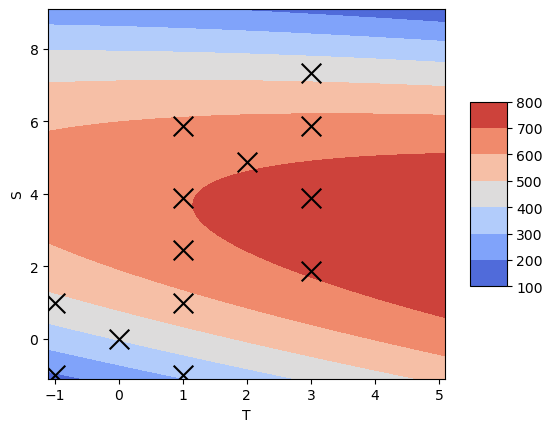

In [28]:
fig, ax = plt.subplots(1, 1)

contour_P5=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(contour_P5,shrink=0.5,aspect=5)
plt.xlabel("T")
plt.ylabel("S")
ax.scatter(x,y,marker='x',color='black',s=200,label="Raw Data")

# With real units

In [29]:
T6=pd.Series([325,320,330,320,330,330,335,340,331,339,331,339,339 ],name='Temp')
S6=pd.Series([.75,.5,.5,1,1,1.36,1.97,2.58,1.77,1.77,2.17,2.17,1.37 ], name='Substrate')
y6=pd.Series([407,193,310,468,571,669,688,463 ,694,725,620,642,716],name='Profit')

In [30]:
DFP6=pd.concat([T6,S6,y6],axis='columns')
print(DFP6)

    Temp  Substrate  Profit
0    325       0.75     407
1    320       0.50     193
2    330       0.50     310
3    320       1.00     468
4    330       1.00     571
5    330       1.36     669
6    335       1.97     688
7    340       2.58     463
8    331       1.77     694
9    339       1.77     725
10   331       2.17     620
11   339       2.17     642
12   339       1.37     716


In [31]:
model_P6=ols('y6~T6*S6+I(T6**2)+I(S6**2)',data=DFP6)
results_P6=model_P6.fit()
print(results_P6.summary2())

                     Results: Ordinary least squares
Model:                 OLS                Adj. R-squared:       1.000    
Dependent Variable:    y6                 AIC:                  47.7722  
Date:                  2023-04-05 16:13   BIC:                  51.1618  
No. Observations:      13                 Log-Likelihood:       -17.886  
Df Model:              5                  F-statistic:          4.058e+04
Df Residuals:          7                  Prob (F-statistic):   1.87e-15 
R-squared:             1.000              Scale:                1.7038   
-------------------------------------------------------------------------
              Coef.     Std.Err.     t     P>|t|     [0.025      0.975]  
-------------------------------------------------------------------------
Intercept  -27605.2695 1737.9964  -15.8834 0.0000 -31714.9779 -23495.5611
T6            155.9542   10.8273   14.4038 0.0000    130.3518    181.5567
S6           1836.9682   91.6217   20.0495 0.0000   1620.31

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


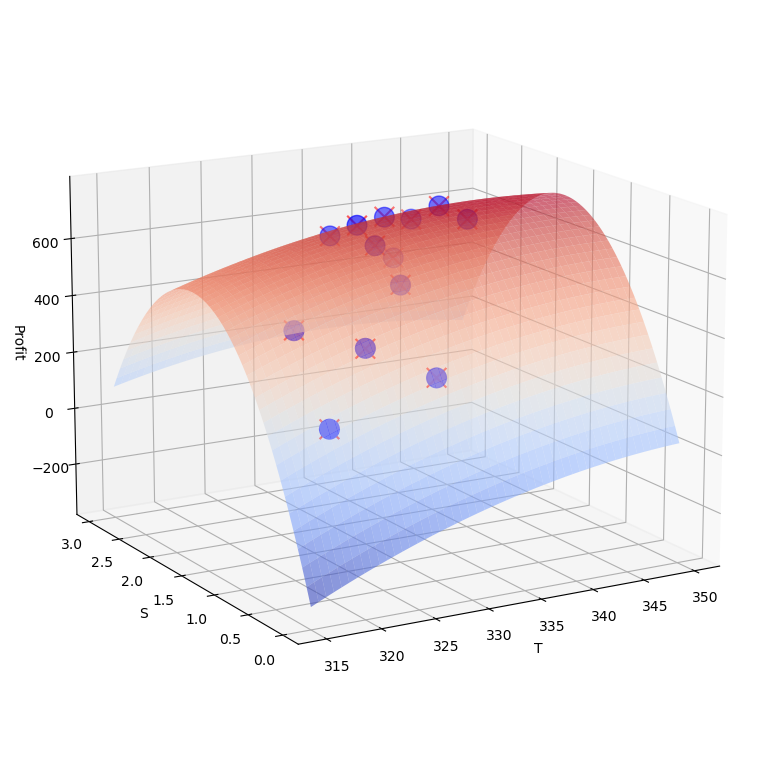

In [32]:
fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df = DFP6
x = df['Temp']
y= df['Substrate']
z = df['Profit']

x1,x2,x3,X4,X5=model_P6.exog_names[1:]

x_surf=np.arange(315,350,0.01)
y_surf=np.arange(0,3,0.01)
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})
zS=results_P6.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.6,cmap='coolwarm')

ax.scatter(x,y,z,marker='x',color='r',s=200,label="Raw Data")
ax.view_init(elev=15,azim=-120)

ax.set_xlabel("T")
ax.set_ylabel("S")
ax.set_zlabel("Profit")
             
ax.scatter(x.values,y.values,results_P6.fittedvalues.values,s=200,color='blue',label="Fited Values")

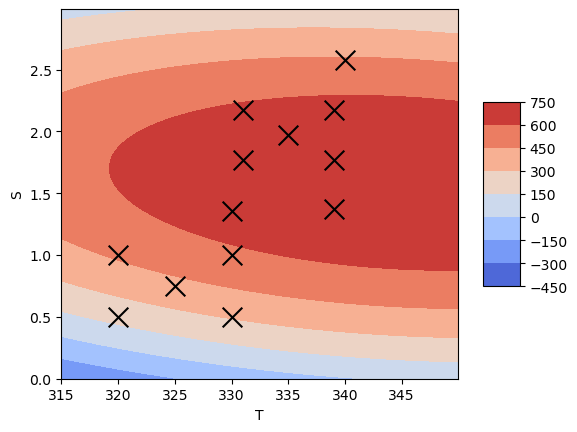

In [33]:
fig, ax = plt.subplots(1, 1)

contour_P6=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(contour_P6,shrink=0.5,aspect=5)
plt.xlabel("T")
plt.ylabel("S")
ax.scatter(x,y,marker='x',color='black',s=200,label="Raw Data")

# Central Composite Design

In [34]:
T15=pd.Series([0,-1,+1,-1,+1,0,1.41,0,-1.41  ],name='Temp')
S15=pd.Series([0,-1,-1,1,1,-1.41,0,1.41,0 ], name='Substrate')
y15=pd.Series([688,694,725,620,642,720,699,610,663],name='Profit')

In [35]:
DFP15=pd.concat([T15,S15,y15],axis='columns')
print(DFP15)

   Temp  Substrate  Profit
0  0.00       0.00     688
1 -1.00      -1.00     694
2  1.00      -1.00     725
3 -1.00       1.00     620
4  1.00       1.00     642
5  0.00      -1.41     720
6  1.41       0.00     699
7  0.00       1.41     610
8 -1.41       0.00     663


In [36]:
model_P15=ols('y15~T15*S15+I(T15**2)+I(S15**2)',data=DFP15)
results_P15=model_P15.fit()
print(results_P15.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.997   
Dependent Variable: y15              AIC:                41.9276 
Date:               2023-04-05 16:13 BIC:                43.1110 
No. Observations:   9                Log-Likelihood:     -14.964 
Df Model:           5                F-statistic:        576.4   
Df Residuals:       3                Prob (F-statistic): 0.000114
R-squared:          0.999            Scale:              4.8843  
-----------------------------------------------------------------
               Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
-----------------------------------------------------------------
Intercept     688.0317   2.2100 311.3314 0.0000 680.9986 695.0647
T15            13.0087   0.7825  16.6238 0.0005  10.5183  15.4991
S15           -39.1289   0.7825 -50.0029 0.0000 -41.6193 -36.6385
T15:S15        -2.2500   1.1050  -2.0362 0.1345  -5.7667   1.2667
I(T15 ** 2)    -4.2058   1.

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


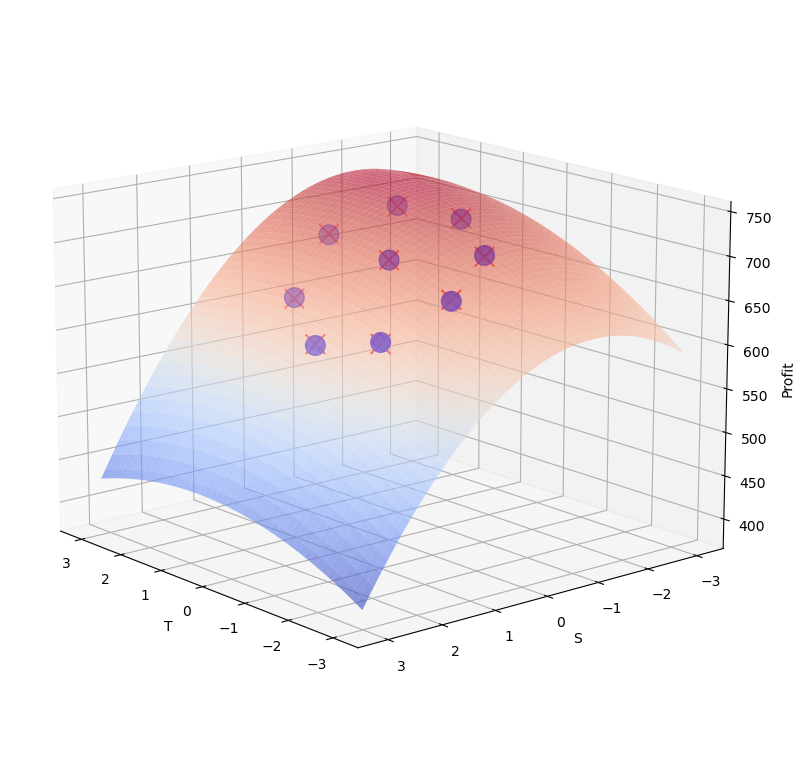

In [37]:
fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df = DFP15
x = df['Temp']
y= df['Substrate']
z = df['Profit']

x1,x2,x3,X4,X5=model_P15.exog_names[1:]

x_surf=np.arange(-3.1,3.1,0.01)
y_surf=np.arange(-3.1,3.1,0.01)
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})
zS=results_P15.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.6,cmap='coolwarm')

ax.scatter(x,y,z,marker='x',color='r',s=200,label="Raw Data")
ax.view_init(elev=15,azim=140)

ax.set_xlabel("T")
ax.set_ylabel("S")
ax.set_zlabel("Profit")
             
ax.scatter(x.values,y.values,results_P15.fittedvalues.values,s=200,color='blue',label="Fited Values")

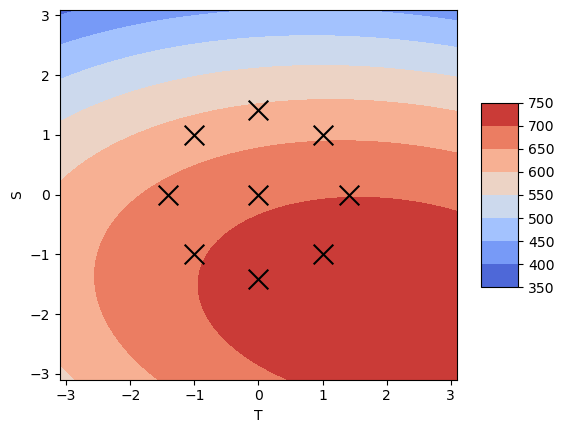

In [38]:
fig, ax = plt.subplots(1, 1)

contour_P15=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(contour_P15,shrink=0.5,aspect=5)
plt.xlabel("T")
plt.ylabel("S")
ax.scatter(x,y,marker='x',color='black',s=200,label="Raw Data")

# Full model 16 experiments and Optimization

In [39]:
T16=pd.Series([325,320,330,320,330,330,335,340,331,339,331,339,339,335,340.64,335,329.36 ],name='Temp')
S16=pd.Series([.75,.5,.5,1,1,1.36,1.97,2.58,1.77,1.77,2.17,2.17,1.37,1.69,1.97,2.25,1.97 ], name='Substrate')
y16=pd.Series([407,193,310,468,571,669,688,463 ,694,725,620,642,716,720,699,610,663],name='Profit')

In [40]:
DFP16=pd.concat([T16,S16,y16],axis='columns')
print(DFP16)

      Temp  Substrate  Profit
0   325.00       0.75     407
1   320.00       0.50     193
2   330.00       0.50     310
3   320.00       1.00     468
4   330.00       1.00     571
5   330.00       1.36     669
6   335.00       1.97     688
7   340.00       2.58     463
8   331.00       1.77     694
9   339.00       1.77     725
10  331.00       2.17     620
11  339.00       2.17     642
12  339.00       1.37     716
13  335.00       1.69     720
14  340.64       1.97     699
15  335.00       2.25     610
16  329.36       1.97     663


In [41]:
model_P16=ols('y16~T16*S16+I(T16**2)+I(S16**2)',data=DFP16)
results_P16=model_P16.fit()
print(results_P16.summary2())

                     Results: Ordinary least squares
Model:                  OLS                Adj. R-squared:       1.000    
Dependent Variable:     y16                AIC:                  62.2214  
Date:                   2023-04-05 16:14   BIC:                  67.2207  
No. Observations:       17                 Log-Likelihood:       -25.111  
Df Model:               5                  F-statistic:          4.585e+04
Df Residuals:           11                 Prob (F-statistic):   2.32e-23 
R-squared:              1.000              Scale:                1.7361   
--------------------------------------------------------------------------
               Coef.     Std.Err.     t     P>|t|     [0.025      0.975]  
--------------------------------------------------------------------------
Intercept   -27438.7757 1646.6957  -16.6629 0.0000 -31063.1285 -23814.4229
T16            154.8693   10.2577   15.0979 0.0000    132.2923    177.4463
S16           1861.4410   84.0006   22.1599 0.0

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


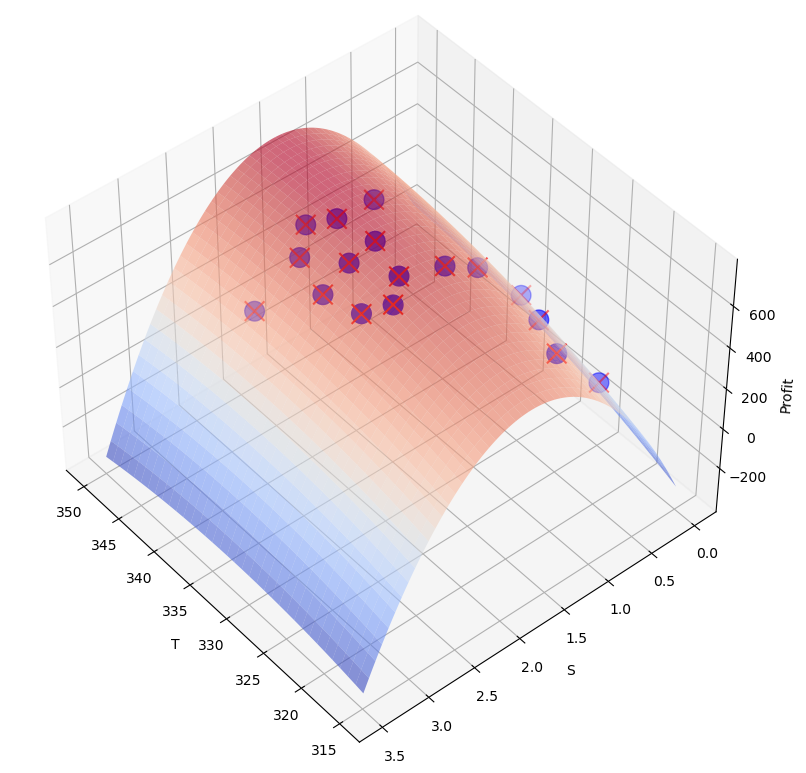

In [42]:
fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df = DFP16
x = df['Temp']
y= df['Substrate']
z = df['Profit']

x1,x2,x3,X4,X5=model_P16.exog_names[1:]

x_surf=np.arange(315,350.01)
y_surf=np.arange(0,3.5,0.01)
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})
zS=results_P16.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.6,cmap='coolwarm')

ax.scatter(x,y,z,marker='x',color='r',s=200,label="Raw Data")
ax.view_init(elev=45,azim=140)

ax.set_xlabel("T")
ax.set_ylabel("S")
ax.set_zlabel("Profit")
             
ax.scatter(x.values,y.values,results_P16.fittedvalues.values,s=200,color='blue',label="Fited Values")

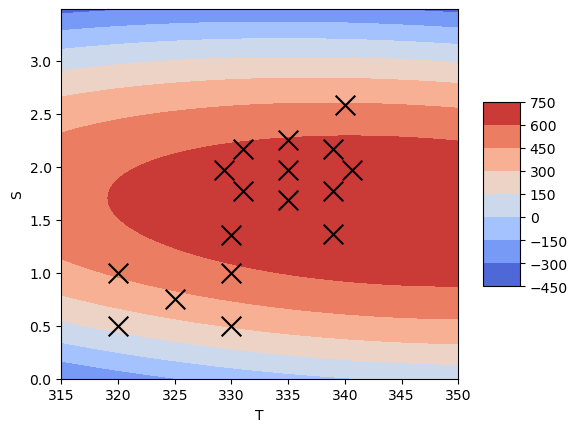

In [43]:
fig, ax = plt.subplots(1, 1)

contour_P16=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(contour_P16,shrink=0.5,aspect=5)
plt.xlabel("T")
plt.ylabel("S")
ax.scatter(x,y,marker='x',color='black',s=200,label="Raw Data")